<a href="https://colab.research.google.com/github/normanchia/ict3104-team08-2023/blob/main/ict3104_team08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ICT3104-team08-2023

## Welcome to our team's notebook for our GenAI project...

### How to use this notebook:

1. View the table on contents via the left toolbar to get orientated with the overall structure of the notebook.
2. Each section of the project has been grouped and outlined properly.
3. The Intial Setup must be run whenever connected to a new runtime, this ensures we have the necessary repos, dependencies and files needed.
4. For the 'Intial Setup' section, you can use the '3 dots' menu on the right of the wording to run the entire section, this makes the setup process easier, rather than having to run individual cells.

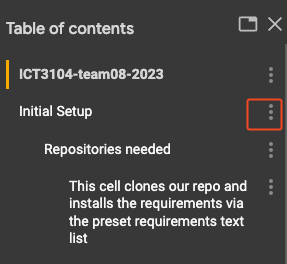

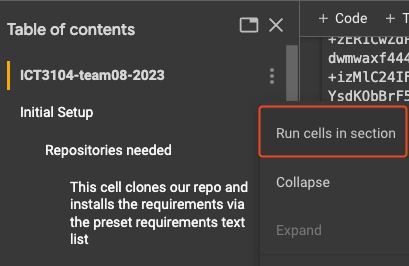


5. Do note, the Initial Setup process can take UP TO 25 mins!!

6. Make sure you have the following repositories in your runtime before trying to run Inference or Training:

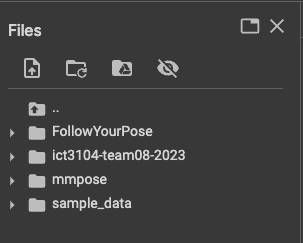

7. Usage of each following section is explained in their respective header cells


----
# 🍜 Initial Setup




## Repositories needed

### These repositories contain the files and directories we need to run the rest of the notebook

### we'll need to clone them into our current runtime and install the packages required - we'll do this in the following few cells

In [ ]:
# @title `This cell clones our repo and installs the requirements via the preset text list `
import time
from IPython.display import display, clear_output, HTML

start_time = time.time()

!git clone https://github.com/normanchia/ict3104-team08-2023
%cd ict3104-team08-2023
!pip install -r requirements.txt
!pip install -r requirements-2.txt

elapsed_time = time.time() - start_time
minutes, seconds = divmod(elapsed_time, 60)
green_text = f"\x1b[32mInitial environment setup (1/4) . \t\t\t\tTime elapsed: {int(minutes)} minutes and {seconds:.2f} seconds...\n\x1b[0m"
clear_output()
print(green_text)

Initial environment setup (1/4) . 				Time elapsed: 4 minutes and 5.97 seconds...



In [ ]:
# @title `This cell updates our local environment, runtimes and python packages`

start_time = time.time()

%cd /content
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.8 2
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.9 1
!python --version
!apt-get update
!apt install software-properties-common
!sudo dpkg --remove --force-remove-reinstreq python3-pip python3-setuptools python3-wheel
!apt-get install python3-pip

# print('Git clone project and install requirements...')
!git clone https://github.com/mayuelala/FollowYourPose.git

elapsed_time = time.time() - start_time
minutes, seconds = divmod(elapsed_time, 60)
green_text = f"\x1b[32mInitial environment setup (2/4) . \t\t\t\tTime elapsed: {int(minutes)} minutes and {seconds:.2f} seconds...\n\x1b[0m"
clear_output()
print(green_text)

Initial environment setup (2/4) . 				Time elapsed: 0 minutes and 36.43 seconds...



In [ ]:
# @title `This cell adds further needed updates to our local environment, runtimes and python packages`

start_time = time.time()

!cd /content/FollowYourPose
!export PYTHONPATH=/content/FollowYourPose:$PYTHONPATH
# %pip install -r requirements.txt
!python -m pip install -q -U --pre triton
!apt update
!python -m pip install -q diffusers==0.11.1 torch==1.13.1 transformers==4.26.0 bitsandbytes==0.35.4 \
imageio-ffmpeg xformers==0.0.16  --extra-index-url https://download.pytorch.org/whl/cu113

elapsed_time = time.time() - start_time
minutes, seconds = divmod(elapsed_time, 60)
green_text = f"\x1b[32mInitial environment setup (3/4) . \t\t\t\tTime elapsed: {int(minutes)} minutes and {seconds:.2f} seconds...\n\x1b[0m"
clear_output()
print(green_text)

Initial environment setup (3/4) . 				Time elapsed: 0 minutes and 40.61 seconds...



## Weight

### The following section helps us pull a preset model into our runtime, this will serve as the base model for later sections

In [ ]:
# @title `Once again, we're updating our local environment, runtimes and python packages` <br><br> WARNING: This cell can take up to 8 mins to run!!

start_time = time.time()

%cd /content/FollowYourPose/
%mkdir checkpoints
!git lfs install
!git clone https://huggingface.co/YueMafighting/FollowYourPose_v1
%mv /content/FollowYourPose/FollowYourPose_v1/* /content/FollowYourPose/checkpoints/
%rm -rf FollowYourPose_v1

elapsed_time = time.time() - start_time
minutes, seconds = divmod(elapsed_time, 60)
green_text = f"\x1b[32mInitial environment setup (4/4) . \t\t\t\tTime elapsed: {int(minutes)} minutes and {seconds:.2f} seconds...\n\x1b[0m"
clear_output()
print(green_text)

Initial environment setup (4/4) . 				Time elapsed: 3 minutes and 23.88 seconds...



---
#  MMPose

###  An additional repo we need to generate skeletons based off of real human actions


In [ ]:
# @title `We need this repo to generate our skeletons`

start_time = time.time()

%cd /content
!git clone https://github.com/open-mmlab/mmpose.git
%cd mmpose
!pip install -r requirements.txt
!pip install -v -e .
!pip install --upgrade bitsandbytes

elapsed_time = time.time() - start_time
minutes, seconds = divmod(elapsed_time, 60)
green_text = f"\x1b[32mMMPose cloned successfully . \t\t\t\tTime elapsed: {int(minutes)} minutes and {seconds:.2f} seconds...\n\x1b[0m"
clear_output()
print(green_text)

MMPose cloned successfully . 				Time elapsed: 0 minutes and 58.20 seconds...



---
# Python Libraries to be installed and imported

### We need to install and import these libraries before we can move on to the next stages

In [ ]:
# @title `All necessary pip installs` <br><br> pip is a python package manager. <br><br>installing via pip simply means installing the packages in this environment and does not take up storage space on your machine if running in Google Colab

!pip install ruamel.yaml
!pip install tqdm
!pip install imageio
!pip install torch
!pip install moviepy
!pip install -U nvidia-cudnn-cu11
!pip install openmim
!pip install accelerate
!pip install nvidia-cublas-cu11
!pip install nvidia-cuda-nvrtc-cu11
!pip install nvidia-cuda-runtime-cu11
!pip install nvidia-cudnn-cu11==8.9.4.25
!pip install omegaconf
!pip install PyYAML
!mim install mmengine
!mim install "mmcv>=2.0.1"
!mim install "mmdet>=3.1.0"
!pip install mediapipe  # added this as one of the imports were failing (kaho)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.4/116.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.9/699.9 MB 2.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-cudnn-cu11
    Found existing installation: nvidia-cudnn-cu11 8.5.0.96
    Uninstalling nvidia-cudnn-cu11-8.5.0.96:
      Successfully uninstalled nvidia-cudnn-cu11-8.5.0.96
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 1.13.1 requires nvidia-cudnn-cu11==8.5.0.96; platform_system == "Linux", but you have nvidia-cudnn-cu11 8.9.6.50 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.3/297.3 kB 32.5 MB/s et

  Using cached nvidia_cudnn_cu11-8.5.0.96-2-py3-none-manylinux1_x86_64.whl (557.1 MB)
  Attempting uninstall: nvidia-cudnn-cu11
    Found existing installation: nvidia-cudnn-cu11 8.9.6.50
    Uninstalling nvidia-cudnn-cu11-8.9.6.50:
      Successfully uninstalled nvidia-cudnn-cu11-8.9.6.50
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.3/719.3 MB 1.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-cudnn-cu11
    Found existing installation: nvidia-cudnn-cu11 8.5.0.96
    Uninstalling nvidia-cudnn-cu11-8.5.0.96:
      Successfully uninstalled nvidia-cudnn-cu11-8.5.0.96
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 1.13.1 requires nvidia-cudnn-cu11==8.5.0.96; platform_system == "Linux", but you have nvidia-cudnn-cu11 8.9.4.25 which is incompatible.
Looking in links: https://download.openmmlab.com/mmcv/dist/cu117/torch1.13.0/index.html
     ━━━━━━━━━━━━

In [ ]:
# @title `Import all needed Python libraries that will be used throughout the notebook`

import os
from os import walk
import ipywidgets as widgets
from ipywidgets import interact, interactive, interact_manual
from IPython.display import display, clear_output, Video, HTML, Image
import yaml
import ruamel.yaml
import subprocess
import shutil
import glob
import re
import datetime
import time
from time import sleep
import csv
from base64 import b64encode
import torch
from moviepy.editor import *
import moviepy.editor as mpe
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
from tqdm import tqdm
from datetime import datetime
import cv2
import numpy as np
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from skimage.metrics import structural_similarity as compare_ssim
import mediapipe as mp
import matplotlib.pyplot as plt


---
# 📼 Data Exploration

### Use the cell below to explore the dataset in our repo and view the videos before running them through the models

In [ ]:
# @title If you are using sims4action dataset with .avi file extension, you may run this cell as a utility tool to convert .avi files to .mp4 files. It REPLACES the .avi files with .mp4 files so keep a copy of the .avi files if you need them.

import moviepy.editor as moviepy

# Create a text input widgets for prompts
video_input = widgets.Textarea(
    description= "Path containing .avi videos: ",
    value = "/content/ict3104-team08-2023/inputs/dataset/sims4action/",
    rows=4
)

def convert_avi_to_mp4_handler(button):
  video_filepath = video_input.value

  try:
    for video in os.listdir(video_filepath):
      if video == ".ipynb_checkpoints":
        continue
      if video[0:len(video) - 3] == "mp4":
        continue
      clip = moviepy.VideoFileClip(f"{video_filepath}{video}")
      clip.write_videofile(f"{video_filepath}{video[0:len(video) - 3]}mp4")  # trim the "avi" and add "mp4" suffix
      os.remove(f"{video_filepath}{video}")
  except FileNotFoundError as e:
    print(e)
    print("Please check the filepath.")

convert_button = widgets.Button(description="Convert videos", button_style='info')
convert_button.on_click(convert_avi_to_mp4_handler)

display(video_input, convert_button)

Textarea(value='/content/ict3104-team08-2023/inputs/dataset/sims4action/', description='Path containing .avi v…

Button(button_style='info', description='Convert videos', style=ButtonStyle())

Moviepy - Building video /content/ict3104-team08-2023/inputs/dataset/sims4action/GS_S8L2_m5.mp4.
MoviePy - Writing audio in GS_S8L2_m5TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/ict3104-team08-2023/inputs/dataset/sims4action/GS_S8L2_m5.mp4



t: 100%|█████████▉| 1639/1647 [00:12<00:00, 123.88it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file /content/ict3104-team08-2023/inputs/dataset/sims4action/GS_S8L2_m5.avi, 706560 bytes wanted but 0 bytes read,at frame 1646/1647, at time 54.87/54.87 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready /content/ict3104-team08-2023/inputs/dataset/sims4action/GS_S8L2_m5.mp4
Moviepy - Building video /content/ict3104-team08-2023/inputs/dataset/sims4action/GS_S8L2_m4.mp4.
MoviePy - Writing audio in GS_S8L2_m4TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/ict3104-team08-2023/inputs/dataset/sims4action/GS_S8L2_m4.mp4



Moviepy - Done !
Moviepy - video ready /content/ict3104-team08-2023/inputs/dataset/sims4action/GS_S8L2_m4.mp4
Moviepy - Building video /content/ict3104-team08-2023/inputs/dataset/sims4action/GS_S7D2_m5.mp4.
MoviePy - Writing audio in GS_S7D2_m5TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/ict3104-team08-2023/inputs/dataset/sims4action/GS_S7D2_m5.mp4



Moviepy - Done !
Moviepy - video ready /content/ict3104-team08-2023/inputs/dataset/sims4action/GS_S7D2_m5.mp4


In [ ]:
%cd /content
import os
from ipywidgets import interact
from IPython.display import display, Video

# Define the root folder path of training videos
main_file_path = "./ict3104-team08-2023/inputs/"

@interact
def select_folder_or_file(root_folder=os.listdir(main_file_path)):
    root_folder_path = os.path.join(main_file_path, root_folder)

    if os.path.isdir(root_folder_path):
        # If the selection is a folder, prompt to choose a nested folder or a file within the root folder
        @interact
        def choose_folder_or_file(selection=os.listdir(root_folder_path)):
            selection_path = os.path.join(root_folder_path, selection)

            if os.path.isfile(selection_path):
                # If the selection is a file, display it
                if selection.endswith(".mp4"):
                    video_display = Video(selection_path, width=512, height=512, embed=True)
                    display(video_display)
                else:
                    print("Please choose a file with .mp4 format.")
            elif os.path.isdir(selection_path):
                # If the selection is a nested folder, prompt to choose a file within the nested folder
                @interact
                def choose_file_in_nested_folder(file=os.listdir(selection_path)):
                    if file.endswith(".mp4"):
                        video_path = os.path.join(selection_path, file)
                        video_display = Video(video_path, width=512, height=512, embed=True)
                        display(video_display)
                    else:
                        print("Please choose a file with .mp4 format within the selected folder.")
            else:
                print("Invalid selection. Please choose a valid folder or file.")
    else:
        print("Invalid selection. Please choose a valid root folder.")


/content


interactive(children=(Dropdown(description='root_folder', options=('dataset', 'example', 'captions'), value='d…

---
# 🦴 ⛹ Usage - Inference

## To conduct our inference, these are the steps we need to follow:



1.   Select real life input video with human actions
2.   Run the real life input video through MMpose to generate a skeleton of the movements being captured
3. Run the skeleton generated through the FYPose pipeline with specified user prompts to generate AI visualised gifs, matching the movements of the chosen skeleton




In [ ]:
# @title `Replacing txt2video.py in FUP`

# cd into FollowYourPose as we will be mainly using this directory for training
%cd /content/FollowYourPose

# Replace txt2video.py at FollowYourPose from the ict3104-team08-2023
# differences between the two yaml files:
# 1. max_train_steps has been decreased from 5000 to 5 (due to Colab limitations)
# 2. training data has been rescaled to 256 x 256 (due to Colab limitations)

source_file = "/content/ict3104-team08-2023/followyourpose/txt2video.py"
destination_file = "/content/FollowYourPose/txt2video.py"

# Copy "txt2video.py" to the destination directory
shutil.copy(source_file, destination_file)
print(f"txt2video.py has been copied to: {destination_file}")


/content/FollowYourPose
txt2video.py has been copied to: /content/FollowYourPose/txt2video.py


## Inference (part 1) - Generating skeletons with MMPose

### This section takes an input video (i.e. charades) and generates a skeleton we can use in the future

In [ ]:
# @title Select an input video and generate a skeleton using MMPOse for FUPose

%cd /content
# Define folder path of training videos
main_file_path = "./ict3104-team08-2023/inputs/"  # change dir here
original_file_path = "" #for result usage

# Create a progress bar widget
progress_bar = widgets.FloatProgress(
    value=0.0,
    min=0.0,
    max=1.0,
    description="Inference Progress:",
    bar_style="info",
    orientation="horizontal",
)

# Create button for showing video
button = widgets.Button(description="Generate Skeleton", button_style='info')

# Unregister previous button's click event
def clear_button_clicks(button):
    button._click_handlers.callbacks = []

@interact
def select_folder_or_file(root_folder=os.listdir(main_file_path)):  # change folder here
    root_folder_path = os.path.join(main_file_path, root_folder)

    if os.path.isdir(root_folder_path):
        # If the selection is a folder, prompt to choose a nested folder or a file within the root folder
        @interact
        def choose_folder_or_file(selection=os.listdir(root_folder_path)):
            selection_path = os.path.join(root_folder_path, selection)

            if os.path.isfile(selection_path):
                # If the selection is a file, display it
                if selection.endswith(".mp4"):
                    video_path = selection_path
                    file_name = selection[:len(selection) - 4]
                    current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
                    output_path = f"{main_file_path}outputs/{current_time}/"

                    def on_button_click(b):
                        print(f"Selected file: {selection}")
                        print(f"Video path: {video_path}")
                        print(f"Output path: {output_path}")

                        progress_bar.value = 0.0  # Set progress to 0 before starting inference

                        current_time = datetime.now()
                        formatted_time = current_time.strftime("%Y%m%d_%H%M%S")
                        new_file_name = f"{file_name}_{formatted_time}"

                        inference_path = "./mmpose/demo/inferencer_demo.py"
                        shell_command = f"python {inference_path} {video_path} --pose2d human --black-background --thickness 5 --vis-out-dir {output_path}"

                        with subprocess.Popen(shell_command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True) as proc:
                            i = 1
                            for line in iter(proc.stdout.readline, ''):
                                print(f"INFO:[{i}] " + line.strip())
                                i += 1
                                # Update progress here if you have a way to measure it
                                # Example: progress_bar.value = i / total_steps  # Update progress incrementally

                            for line in iter(proc.stderr.readline, ''):
                                print("ERROR: " + line.strip())
                                # Update progress here if you have a way to measure it

                        progress_bar.value = 1.0  # Set progress to 1 when inference is complete
                        print("\nInference Complete.")
                        # Copy the original video to the new directory
                        shutil.copy2(video_path, output_path)
                        print(f"\nPlease check the output folder: {output_path} for the resultant skeleton")

                    # Clear previous button clicks
                    clear_button_clicks(button)

                    # Attach click event to the button
                    button.on_click(on_button_click)

                    # Display the button and progress bar
                    display(button)
                    display(progress_bar)
                else:
                    print("Please choose a file with .mp4 format.")
            elif os.path.isdir(selection_path):
                # If the selection is a nested folder, prompt to choose a file within the nested folder
                @interact
                def choose_file_in_nested_folder(file=os.listdir(selection_path)):
                    if file.endswith(".mp4"):
                        video_path = os.path.join(selection_path, file)
                        file_name = file[:len(file) - 4]
                        current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
                        output_path = f"{main_file_path}outputs/{current_time}/"

                        def on_button_click(b):
                            print(f"Selected file: {selection}")
                            print(f"Video path: {video_path}")
                            print(f"Output path: {output_path}")

                            progress_bar.value = 0.0  # Set progress to 0 before starting inference

                            original_file_path = video_path
                            current_time = datetime.now()
                            formatted_time = current_time.strftime("%Y%m%d_%H%M%S")
                            new_file_name = f"{file_name}_{formatted_time}"

                            inference_path = "./mmpose/demo/inferencer_demo.py"
                            shell_command = f"python {inference_path} {video_path} --pose2d human --black-background --thickness 5 --vis-out-dir {output_path}"

                            with subprocess.Popen(shell_command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True) as proc:
                                i = 1
                                print(f"Inference Starting...")
                                display(progress_bar)

                                for line in iter(proc.stdout.readline, ''):
                                    # print(f"INFO:[{i}] " + line.strip())
                                    i += 1
                                    progress_bar.value = i / 500 #just a dummy value for fun :)
                                    # Update progress here if there's a way to measure it
                                    # Example: progress_bar.value = i / total_steps  # Update progress incrementally

                                for line in iter(proc.stderr.readline, ''):
                                    print("ERROR: " + line.strip())
                                    # Update progress here if you have a way to measure it

                            progress_bar.value = 1.0  # Set progress to 1 when inference is complete
                            print("\nInference Complete.")
                            # Copy the original video to the new directory
                            # Extract the base file name from the video path
                            base_file_name = os.path.basename(video_path)
                            # Create a new file name by appending '-original' before the file extension
                            new_file_name = f"{base_file_name.rsplit('.', 1)[0]}-original.{base_file_name.rsplit('.', 1)[1]}"
                            # Define the complete new file path in the output directory
                            new_file_path = os.path.join(output_path, new_file_name)

                            # Copy the original video file to the new file path in the output directory
                            shutil.copy2(video_path, new_file_path)
                            # shutil.copy2(video_path, output_path)
                            print(f"\nPlease check the output folder: {output_path} for the resultant skeleton")

                        # Clear previous button clicks
                        clear_button_clicks(button)

                        # Attach click event to the button
                        button.on_click(on_button_click)

                        # Display the button and progress bar
                        display(button)
                    else:
                        print("Please choose a file with .mp4 format within the selected folder.")
            else:
                print("Invalid selection. Please choose a valid folder or file.")
    else:
        print("Invalid selection. Please choose a valid root folder.")


/content


interactive(children=(Dropdown(description='root_folder', options=('dataset', 'example', 'captions'), value='d…

Selected file: charades
Video path: ./ict3104-team08-2023/inputs/dataset/charades/Charades_03.mp4
Output path: ./ict3104-team08-2023/inputs/outputs/20231112_152743/
Inference Starting...


FloatProgress(value=0.0, bar_style='info', description='Inference Progress:', max=1.0)

ERROR: 2023-11-12 15:27:52.400653: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
ERROR: 2023-11-12 15:27:52.400692: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
ERROR: 2023-11-12 15:27:52.400724: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
ERROR: 2023-11-12 15:27:53.618118: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
ERROR: Downloading: "https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-body7_pt-body7_420e-256x192-e48f03d0_20230504.pth" to /root/.cache/torch/hub/checkpoints/rtmpose-m_simcc-body7_pt

## Inference (part 2) - GIF Generation with FYPose

### we can now *generate* videos with our skeletons and prompts

Firstly, select the earlier generated skeleton or any other skeleton to be run through the FYPose pipeline via the cell below

In [ ]:
# @title `Select input skeleton video`
%cd /content

gen_skele_path = "./ict3104-team08-2023/inputs/outputs"
dummy_dir = "./ict3104-team08-2023/inputs/outputs/placeholder"

# Check if the directory already exists
if not os.path.exists(dummy_dir):
    # If it doesn't exist, create it
    os.makedirs(dummy_dir)

# Function to get folders in the outputs directory
def get_folders(path):
    return [folder for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder))]

# Function to get video files in a given directory
def get_video_files(path):
    return [f for f in os.listdir(path) if f.endswith((".mov", ".mp4")) and os.path.isfile(os.path.join(path, f))]

# Create dropdown for folder selection
folders = get_folders(gen_skele_path)
folder_dropdown = widgets.Dropdown(
    options=get_folders(gen_skele_path),
    description='Select a folder: ',
    value=folders[0] if len(folders) == 1 else None  # Automatically select if only one folder is present
)

# Create dropdown for video selection, initially empty
video_dropdown = widgets.Dropdown(
    options=[],
    description='Select a video: ',
)

# Variables to store the selected paths
selected_folder_path = None
video_file_path = None
skeleton_path = None

# Function to update video dropdown when a folder is selected
def on_folder_select(change):
    global selected_folder_path
    selected_folder_path = os.path.join(gen_skele_path, change['new'])
    print(f"Looking for videos in: {selected_folder_path}")  # Debug print
    video_dropdown.options = get_video_files(selected_folder_path)

# Watch for changes on the folder dropdown
folder_dropdown.observe(on_folder_select, names='value')

# Create a button for confirming the selection
confirm_button = widgets.Button(description="Confirm Selection", button_style='info')

# Function to handle button click
def on_confirm_button_click(button):
    global skeleton_path, video_file_path
    selected_video = video_dropdown.value
    if selected_video is None:
        print("No video selected.")
        return

    # Get the video file path
    video_file_path = os.path.join(selected_folder_path, selected_video)

    # skeleton path (assuming the skeleton video is in the same folder as the selected video)
    skeleton_path = video_file_path.rsplit('.', 1)[0] + ".mp4"

    print("Selected video for inference:", video_file_path, end='\n\n')

# Set up the button click handler
confirm_button.on_click(on_confirm_button_click)

# Display the folder dropdown, video dropdown, and the confirm button
display(folder_dropdown, video_dropdown, confirm_button)


/content


Dropdown(description='Select a folder: ', options=('20231112_152743', 'placeholder'), value=None)

Dropdown(description='Select a video: ', options=(), value=None)

Button(button_style='info', description='Confirm Selection', style=ButtonStyle())

Looking for videos in: ./ict3104-team08-2023/inputs/outputs/20231112_152743
Selected video for inference: ./ict3104-team08-2023/inputs/outputs/20231112_152743/Charades_03.mp4



Next, confirm the selection the pretrained model,

enter input prompts (prompts for the gifs to be generated based on)

and finally, run the generation process via the cell below

In [ ]:
# @title `Confirm pretrained model, input prompts and run video generation`

%cd /content

# Create a dropdown widget for pretrained and finetuned models
output_model_path = "/content/output_model/"

if os.path.exists(output_model_path):
    output_model_path_list = ["/content/output_model/" + f for f in os.listdir(output_model_path) if f != ".ipynb_checkpoints"]
else:
    output_model_path_list = []

# Create a dropdown widget for pretrained and finetuned models
output_model_path = "/content/output_model/"
model_list = ["./checkpoints/stable-diffusion-v1-4"] + output_model_path_list
pretrained_model_dropdown = widgets.Dropdown(
    options=model_list,
    description='Select a Pretrained Model: ',
)

# Read the config YAML content from the file
yaml_file_path = "./ict3104-team08-2023/configs/pose_sample.yaml"
with open(yaml_file_path, 'r') as file:
    try:
        data = yaml.safe_load(file)
    except yaml.YAMLError as exc:
        print(exc)

pretrained_model_path = data['pretrained_model_path']
validation_data = data['validation_data']
prompts = validation_data['prompts']

# Create a text input widgets for prompts
prompt_1_input = widgets.Textarea(
    description='Prompt 1:',
    value = 'hulk on the beach',
    rows=4
)

prompt_2_input = widgets.Textarea(
    description='Prompt 2:',
    value = 'obama on the moon',
    rows=4
)

prompt_3_input = widgets.Textarea(
    description='Prompt 3:',
    value = 'darth vader on the death star',
    rows=4
)

#display button to update config file
update_config_button = widgets.Button(description="Update Config", button_style='info')
output_widget = widgets.Output()

def update_config(button_click):
    updated_path = pretrained_model_dropdown.value
    data['pretrained_model_path'] = updated_path

    # getting prompt_1_input, prompt_2_input, and prompt_3_input
    updated_prompts = [prompt_1_input.value, prompt_2_input.value, prompt_3_input.value]

    # Update the 'prompts' key in the 'validation_data' dictionary
    data['validation_data']['prompts'] = updated_prompts

    # Set video length to 8
    data['validation_data']['video_length'] = 8

    # Write the updated content back to the file
    with open(yaml_file_path, 'w') as yaml_file:
        yaml.dump(data, yaml_file, sort_keys=False)

    # Display the updated YAML content in the output widget
    with output_widget:
        # clear_output()
        print('\n\n Updated config: \n\n')
        print(yaml.dump(data, sort_keys=False))

    os.chdir("/content/FollowYourPose")
    display(output_widget, run_inference_button)

update_config_button.on_click(update_config)

# Display input fields
display(pretrained_model_dropdown)
display(prompt_1_input, prompt_2_input, prompt_3_input)

# Preview
display(update_config_button, output_widget)

################################################################################################################################################

run_inference_button = widgets.Button(description="Run Inference", button_style='info')
output_widget = widgets.Output()

#global variable to store result and skeleton selected, for display later
results = []

def run_inference(button_click):
  global results, skeleton_path
  with output_widget:
        # clear_output()
        print("Inference is running, please wait...")

  #get all variables needed
  #yaml config used path
  yaml_config_path = "../"+yaml_file_path #YAML path extracted from selection

  #Execute Inference to produce results

  results = !TORCH_DISTRIBUTED_DEBUG=DETAIL accelerate launch txt2video.py --config={yaml_config_path} --skeleton_path={"."+skeleton_path} --output_dir_name={"output_ict3104"}

  with output_widget:
        clear_output()
        # Get the current working directory
        current_path = os.getcwd()

        # Print the current working directory
        print(f"The current working directory is: {current_path}")
        print("Inference completed.")
        print("\n".join(results))  # Print the results list as a string, join elements with a newline


run_inference_button.on_click(run_inference)

# Display the button and output widget.


/content


Dropdown(description='Select a Pretrained Model: ', options=('./checkpoints/stable-diffusion-v1-4', '/content/…

Textarea(value='hulk on the beach', description='Prompt 1:', rows=4)

Textarea(value='obama on the moon', description='Prompt 2:', rows=4)

Textarea(value='darth vader on the death star', description='Prompt 3:', rows=4)

Button(button_style='info', description='Update Config', style=ButtonStyle())

Output()

Output()

Button(button_style='info', description='Run Inference', style=ButtonStyle())

With the generation done, we can now view our results via the cell below

Dropdown(description='Select a gif: ', index=2, options=('2023-11-12 15:35:30.094980.gif', 'darth vader on the…

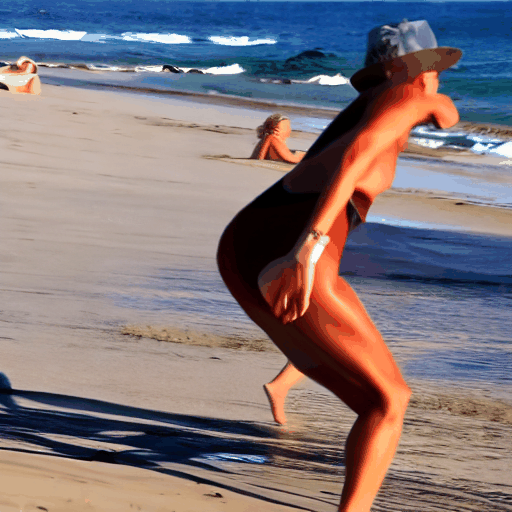

In [ ]:
# @title `Extract the output path from the model and load up gifs in that folder for display`
%cd /content

# Assuming 'results' is your array of log messages
results_string = '\n'.join(results)  # Convert the array to a string for regex processing

# Define the regex pattern to look for your specific log message format
pattern = re.compile(r'INFO - __main__ - (.*)')

# Use the findall method to get all occurrences of the pattern
output_directories = pattern.findall(results_string)
print(output_directories)

# Now process each directory to remove the .gif extension
output_directories_no_ext = [output.replace('.gif', '') for output in output_directories]

# Assuming there's at least one output directory, get the first one (replace '0' with the index of the directory you want)
output_directory_no_ext = output_directories_no_ext[1]

# The substring you want to start with
start_pattern = "/content/"

# Find the start index of the pattern
start_index = output_directory_no_ext.find(start_pattern)

# Check if the pattern is found
if start_index != -1:
    # Extract the substring from the start index to the end
    output_directory_no_ext = output_directory_no_ext[start_index:]

# Get the list of gif files in the directory
print (output_directory_no_ext)

gif_files = [f for f in os.listdir(output_directory_no_ext) if f.endswith('.gif')]
gif_files.sort()  # Optional: sort the files alphabetically

# Create a dropdown menu
gif_dropdown = widgets.Dropdown(
    options=gif_files,
    description='Select a gif: ',
)

# Function to display the selected gif
def display_gif(change):
    clear_output(wait=True)  # Clear the previous output
    selected_gif = change['new']  # Get the newly selected gif file name
    display(gif_dropdown)  # Redisplay the dropdown (since clear_output will clear it too)
    display(Image(filename=os.path.join(output_directory_no_ext, selected_gif)))  # Display the selected gif

# Set up the observer to call 'display_gif' whenever the dropdown selection changes
gif_dropdown.observe(display_gif, names='value')

# Display the dropdown menu
display(gif_dropdown)

# Optionally: Display the first gif by default
if gif_files:
    display(Image(filename=os.path.join(output_directory_no_ext, gif_files[0])))
    print(f"{output_directory_no_ext}/{gif_files[0]}")



In [ ]:
# @title `Combine the 3 videos into 1`

%cd /content

from moviepy.editor import VideoFileClip, concatenate_videoclips, clips_array, TextClip
from IPython.display import Video

# Create an output directory
output_dir = "/content/output-video"
os.makedirs(output_dir, exist_ok=True)

original_video_path = video_file_path[:len(video_file_path) - 4:]+"-original.mp4"
skeleton_video_path = video_file_path

# Folder with your additional videos
folder_path = f"{output_directory_no_ext}"

# Load your video files
video1 = VideoFileClip(f"{original_video_path}")
video2 = VideoFileClip(f"{skeleton_video_path}")

# Get all video files in the directory
video_files = [f for f in os.listdir(folder_path) if f.endswith(('.mp4', '.mov','.gif'))]

combined_clips = []

# Find the duration of the longest video
# max_duration = max(video1.duration, video2.duration, video3.duration)

# Function to loop a video to match the longest duration
def loop_video(clip, target_duration):
    loop_count = int(target_duration // clip.duration) + 1
    return concatenate_videoclips([clip] * loop_count).subclip(0, target_duration)

# Process each additional video
for i, video_file in enumerate(video_files):
    # Load the third video
    video3 = VideoFileClip(os.path.join(folder_path, video_file))

    # Find the duration of the longest video
    max_duration = max(video1.duration, video2.duration, video3.duration)

    # Loop each video if it is shorter than the longest one
    video1_loop = loop_video(video1, max_duration) if video1.duration < max_duration else video1
    video2_loop = loop_video(video2, max_duration) if video2.duration < max_duration else video2
    video3_loop = loop_video(video3, max_duration) if video3.duration < max_duration else video3

    # Resize videos to have the same height
    max_height = max(video1_loop.size[1], video2_loop.size[1], video3_loop.size[1])
    video1_resized = video1_loop.resize(height=max_height)
    video2_resized = video2_loop.resize(height=max_height)
    video3_resized = video3_loop.resize(height=max_height)

    # Combine the videos side by side
    combined_clip = clips_array([[video1_resized, video2_resized, video3_resized]])

     # Extract the filename without the extension
    video3_name = os.path.splitext(video_file)[0]

    # Write the result to a file
    output_filename = f"{video3_name}_combined.mp4"
    output_path = os.path.join(output_dir, output_filename)
    combined_clip.write_videofile(output_path, codec="libx264")

/content
Moviepy - Building video /content/output-video/obama on the moon_combined.mp4.
Moviepy - Writing video /content/output-video/obama on the moon_combined.mp4



t:   7%|▋         | 44/659 [00:00<00:13, 47.11it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file /content/FollowYourPose/checkpoints/inference/output_ict3104/obama on the moon.gif, 786432 bytes wanted but 0 bytes read,at frame 20/22, at time 0.87/0.95 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+

  warnings.warn("Warning: in file %s, "%(self.filename)+

t: 100%|██████████| 659/659 [00:49<00:00, 10.74it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file ./ict3104-team08-2023/inputs/outputs/20231112_152743/Charades_03-original.mp4, 518400 bytes wanted but 0 bytes read,at frame 658/659, at time 27.42/27.42 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+

  warnings.warn("Warning: in file %s, "%(self.filename

Moviepy - Done !
Moviepy - video ready /content/output-video/obama on the moon_combined.mp4
Moviepy - Building video /content/output-video/hulk on the beach_combined.mp4.
Moviepy - Writing video /content/output-video/hulk on the beach_combined.mp4



t:   6%|▋         | 42/659 [00:01<00:17, 34.81it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file /content/FollowYourPose/checkpoints/inference/output_ict3104/hulk on the beach.gif, 786432 bytes wanted but 0 bytes read,at frame 20/22, at time 0.87/0.95 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+

t:   7%|▋         | 46/659 [00:01<00:19, 31.54it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file /content/FollowYourPose/checkpoints/inference/output_ict3104/hulk on the beach.gif, 786432 bytes wanted but 0 bytes read,at frame 21/22, at time 0.91/0.95 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready /content/output-video/hulk on the beach_combined.mp4
Moviepy - Building video /content/output-video/darth vader on the death star_combined.mp4.
Moviepy - Writing video /content/output-video/darth vader on the death star_combined.mp4



t:   7%|▋         | 44/659 [00:01<00:18, 33.17it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file /content/FollowYourPose/checkpoints/inference/output_ict3104/darth vader on the death star.gif, 786432 bytes wanted but 0 bytes read,at frame 20/22, at time 0.87/0.95 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+

  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready /content/output-video/darth vader on the death star_combined.mp4
Moviepy - Building video /content/output-video/2023-11-12 15:35:30.094980_combined.mp4.
Moviepy - Writing video /content/output-video/2023-11-12 15:35:30.094980_combined.mp4



t:   7%|▋         | 44/659 [00:02<00:33, 18.63it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file /content/FollowYourPose/checkpoints/inference/output_ict3104/2023-11-12 15:35:30.094980.gif, 2390112 bytes wanted but 0 bytes read,at frame 20/22, at time 0.87/0.95 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+

t:   7%|▋         | 46/659 [00:02<00:34, 17.69it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file /content/FollowYourPose/checkpoints/inference/output_ict3104/2023-11-12 15:35:30.094980.gif, 2390112 bytes wanted but 0 bytes read,at frame 21/22, at time 0.91/0.95 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready /content/output-video/2023-11-12 15:35:30.094980_combined.mp4


In [ ]:
# @title `Add caption to the video`

import cv2
import numpy as np
from moviepy.editor import VideoFileClip

def add_text_to_video(video_path, text, output_path):
    cap = cv2.VideoCapture(video_path)
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    out = None

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        if out is None:
            height, width = frame.shape[:2]
            out = cv2.VideoWriter(output_path, fourcc, 30.0, (width, height))

        # Add text to frame
        cv2.putText(frame, text, (50, height - 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

        out.write(frame)

    cap.release()
    out.release()

# Directory containing your created videos
video_folder = "/content/output-video"

# Get all created video files in the directory
created_videos = [f for f in os.listdir(video_folder) if f.endswith('.mp4')]

# Process each video
for video_file in created_videos:
    video_path = os.path.join(video_folder, video_file)
    output_path = os.path.join(video_folder, f"captioned_{video_file}")
    caption = os.path.splitext(video_file)[0]  # Use filename without extension as caption

    # Add caption to the video
    add_text_to_video(video_path, caption, output_path)

In [ ]:
# @title Put skeleton overlay on original video and generated gif
import moviepy.editor as mpe

output_dir = "/content/impose-output"
os.makedirs(output_dir, exist_ok=True)

skeleton_video_path = video_file_path
generated_videos_path = f"{output_directory_no_ext}"

video_files = [f for f in os.listdir(generated_videos_path) if f.endswith(('.mp4', '.mov','.gif'))]

for i in video_files:
    original_video_path = video_file_path[:len(video_file_path) - 4:]+"-original.mp4"
    generated_video_path = f'{output_directory_no_ext}/{i}'

    tempOutputPath = f'impose-output/{i[:-4]}_imposed_combined.mp4'  # Save output in 'output-folder' and remove file extension from 'i'

    # Load the original and generated videos
    original_clip = mpe.VideoFileClip(original_video_path, target_resolution=(1080, 1920))
    generated_clip = mpe.VideoFileClip(generated_video_path, target_resolution=(1080, 1920))
    overlay_clip = mpe.VideoFileClip(skeleton_video_path, has_mask=True, target_resolution=(1080,1920))

    opacity_level = 0.8  # Adjust this value as needed
    overlay_clip_with_opacity = overlay_clip.set_opacity(opacity_level)

    # Superimpose the generated video over the original
    original_and_overlay = mpe.CompositeVideoClip([original_clip,overlay_clip_with_opacity])
    generated_and_overlay = mpe.CompositeVideoClip([generated_clip,overlay_clip_with_opacity])

    merged_clip = mpe.clips_array([[original_and_overlay,generated_and_overlay]])
    merged_clip = merged_clip.resize((1680,560))
    merged_clip.write_videofile(
        tempOutputPath,
        remove_temp=True,
        codec="libx264",
        audio_codec="aac",
        threads=6
    )


t:   0%|          | 2/659 [00:44<03:13,  3.40it/s, now=None]

Moviepy - Building video impose-output/obama on the moon_imposed_combined.mp4.
Moviepy - Writing video impose-output/obama on the moon_imposed_combined.mp4




t: 100%|██████████| 659/659 [08:17<00:00,  1.44it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file ./ict3104-team08-2023/inputs/outputs/20231112_152743/Charades_03-original.mp4, 6220800 bytes wanted but 0 bytes read,at frame 658/659, at time 27.42/27.42 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+

  warnings.warn("Warning: in file %s, "%(self.filename)+


t:   0%|          | 2/659 [09:03<03:13,  3.40it/s, now=None]

Moviepy - Done !
Moviepy - video ready impose-output/obama on the moon_imposed_combined.mp4


t:   0%|          | 2/659 [09:04<03:13,  3.40it/s, now=None]

Moviepy - Building video impose-output/hulk on the beach_imposed_combined.mp4.
Moviepy - Writing video impose-output/hulk on the beach_imposed_combined.mp4




t:   0%|          | 2/659 [17:34<03:13,  3.40it/s, now=None]

Moviepy - Done !
Moviepy - video ready impose-output/hulk on the beach_imposed_combined.mp4


t:   0%|          | 2/659 [17:35<03:13,  3.40it/s, now=None]

Moviepy - Building video impose-output/darth vader on the death star_imposed_combined.mp4.
Moviepy - Writing video impose-output/darth vader on the death star_imposed_combined.mp4




t:   0%|          | 2/659 [25:55<03:13,  3.40it/s, now=None]

Moviepy - Done !
Moviepy - video ready impose-output/darth vader on the death star_imposed_combined.mp4


t:   0%|          | 2/659 [25:56<03:13,  3.40it/s, now=None]

Moviepy - Building video impose-output/2023-11-12 15:35:30.094980_imposed_combined.mp4.
Moviepy - Writing video impose-output/2023-11-12 15:35:30.094980_imposed_combined.mp4




t:  28%|██▊       | 182/659 [02:13<06:05,  1.30it/s, now=None]

KeyboardInterrupt: ignored

In [ ]:
# @title Add caption to video created by superimpose


def add_text_to_video(video_path, text, output_path):
    cap = cv2.VideoCapture(video_path)
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    out = None

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        if out is None:
            height, width = frame.shape[:2]
            out = cv2.VideoWriter(output_path, fourcc, 30.0, (width, height))

        # Add text to frame
        cv2.putText(frame, text, (50, height - 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

        out.write(frame)

    cap.release()
    out.release()

# Directory containing your created videos
video_folder = "/content/impose-output"

# Get all created video files in the directory
created_videos = [f for f in os.listdir(video_folder) if f.endswith('.mp4')]

# Process each video
for video_file in created_videos:
    video_path = os.path.join(video_folder, video_file)
    output_path = os.path.join(video_folder, f"captioned_{video_file}")
    caption = os.path.splitext(video_file)[0]  # Use filename without extension as caption

    # Add caption to the video
    add_text_to_video(video_path, caption, output_path)


---
# 🏋 Usage - Training

In [ ]:
# @title `Replacing config files and hdvila.py in FollowYourPose`

# cd into FollowYourPose as we will be mainly using this directory for training
%cd /content/FollowYourPose

# Replace pose_train.yaml at FollowYourPose from the ict3104-team08-2023
# differences between the two yaml files:
# 1. max_train_steps has been decreased from 5000 to 5 (due to Colab limitations)
# 2. training data has been rescaled to 256 x 256 (due to Colab limitations)

pose_train_source_file = "/content/ict3104-team08-2023/training/configs/pose_train.yaml"
pose_train_destination_file = "/content/FollowYourPose/configs/pose_train.yaml"

# Copy "pose_train.yaml" to the destination directory
shutil.copy(pose_train_source_file, pose_train_destination_file)
print(f"pose_train.yaml has been copied to: {pose_train_destination_file}")

# hdvila.py changes:
# 1. data directory set to '/content/ict3104-team08-2023/FollowYourPose/followyourpose/data' to find the 'caption_rm2048_train.csv'
# 2. part of the code that reads captions has been changed to read the captions properly in the caption_rm2048_train.csv file since the data has been changed

hdvila_source_file = "/content/ict3104-team08-2023/training/hdvila.py"
hdvila_destination_file = "/content/FollowYourPose/followyourpose/data/hdvila.py"

# Copy "hdvila.py" to the destination directory
shutil.copy(hdvila_source_file, hdvila_destination_file)
print(f"hdvila.py has been copied to: {hdvila_destination_file}")

/content/FollowYourPose
pose_train.yaml has been copied to: /content/FollowYourPose/configs/pose_train.yaml
hdvila.py has been copied to: /content/FollowYourPose/followyourpose/data/hdvila.py


Note: If you would like to provide your own dataset and captions file, simply put them as a folder in /ict3104-team08-2023/inputs/dataset/\<your-dataset> and /ict3104-team08-2023/inputs/captions/\<your-captions> respectively. The captions file is a csv that must follow the following format: clip_id,caption,part_id.

Clip_is the name of the mp4 file that you wish to fine tune the model on. The captions describes respective clips. The part_id is not used for our demo but if you have several different "video parts" containing different videos, then your captions can be used to reference those parts. For us, it always defaults to 1, but feel free to add additional parts for your own use case.

How the training works is, it will take the dataset (the videos) and the captions that are used to describe the dataset and fine-tune the pretrained model based both of these to identify the actions in the videos and the words used to describe these actions.

In [ ]:
# @title `Choose a dataset and captions to use for training `
%cd /content

import shutil

training_dataset_path = "/content/ict3104-team08-2023/inputs/dataset/"
dataset_folder = [f for f in os.listdir(training_dataset_path) if f != ".ipynb_checkpoints"]
dataset_dropdown = widgets.Dropdown(
    options=dataset_folder,
    description='Select a dataset: ',
)

caption_path = "/content/ict3104-team08-2023/inputs/captions/"
caption_folder = [f for f in os.listdir(caption_path) if f != ".ipynb_checkpoints"]
caption_dropdown = widgets.Dropdown(
    options=caption_folder,
    description='Select captions: ',
)

# Variables to store the selected dataset
selected_dataset_dir = ''
selected_captions_file = ''

# Create a button for confirming the selection
confirm_button = widgets.Button(description="Confirm Dataset Selection", button_style='info')

# Function to handle button click
def on_confirm_button_click(button):
  # Access the selected value from the dropdown
  global selected_dataset_dir
  selected_dataset_dir = dataset_dropdown.value

  # copy the folder from the selected dataset to the FollowYourPose repo to set up training

  # Define the source and destination directory paths
  source_dir = f"{training_dataset_path}{selected_dataset_dir}"
  destination_dir = '/content/FollowYourPose/followyourpose/data/part_1/video_clips'

  # Copy the entire directory to the new location
  shutil.copytree(source_dir, destination_dir, dirs_exist_ok=True)

  # access selected caption from dropdown
  global selected_captions_file
  selected_captions_file = caption_dropdown.value

  # copy the captions over to follow the file structure required by hdvilla.py

  # Define the source and destination file paths
  source_file = f"{caption_path}{selected_captions_file}"
  destination_file = '/content/FollowYourPose/followyourpose/data/'

  # Copy the single file to the new location
  shutil.copy(source_file, destination_file)

  print("Data set selection success!")

# Set up the button click handler
confirm_button.on_click(on_confirm_button_click)

# Display the dropdown and the confirm button
display(dataset_dropdown, caption_dropdown, confirm_button)

/content


Dropdown(description='Select a dataset: ', options=('charades', 'sims4action'), value='charades')

Dropdown(description='Select captions: ', options=('caption_rm2048_train_10.csv',), value='caption_rm2048_trai…

Button(button_style='info', description='Confirm Dataset Selection', style=ButtonStyle())

Data set selection success!


Note: If you notice that the model name is being truncated, try waiting for a few seconds before clicking on the training button to let colab process your model name input :)

In [ ]:
# @title `Start fine-tuning/training process`

# Create a text input widgets for model name
# Specify a name for the new model
model_name_input = widgets.Textarea(
    description='Model name:',
    value = 'Enter model name',
    rows=2
)

display(model_name_input)

# Create a button for confirming the selection
run_training_button = widgets.Button(description="Start training", button_style='success')

# Read the config YAML content from the file
def load_yaml_file_data(path: str) -> dict:
  with open(path, 'r') as file:
    try:
        data = yaml.safe_load(file)
    except yaml.YAMLError as exc:
        print(exc)
    return data

def write_to_yaml_file(path: str, data: dict) -> None:
    # Write the updated content back to the file
    with open(path, 'w') as yaml_file:
        yaml.dump(data, yaml_file, sort_keys=False)

def run_training_button_handler(button):
  global model_name_input
  yaml_file_path = "/content/FollowYourPose/configs/pose_train.yaml"
  config_data = load_yaml_file_data(yaml_file_path)
  config_data["output_dir"] = f"/content/output_model/{model_name_input.value}/"
  config_data["train_data"]["video_path"] = f"/content/FollowYourPose/followyourpose/data/part_1/video_clips"
  write_to_yaml_file(yaml_file_path, config_data)
  config_data = load_yaml_file_data(yaml_file_path)
  print(config_data)
  print("====================")
  print(f"Your model name is: {model_name_input.value}")
  print("Starting training...")
  print("Please wait until you see a 'Training success!!!' message. It takes about 2 minutes for the training sequence to start up :)")
  print("====================")

  # Run the training sequence
  %cd /content/FollowYourPose

  config_file_path = yaml_file_path
  command = f"TORCH_DISTRIBUTED_DEBUG=DETAIL accelerate launch /content/FollowYourPose/train_followyourpose.py --config='{config_file_path}'"
  result = subprocess.run(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
  print(result.stdout.decode())
  print(result.stderr.decode())

  print("Training success!!!")
  print("Please check your root directory for 'output_model/<your-model-name>/'")
  print("In order to view all of the models used for inference (including the latest fine-tuned one), rerun the cell that has the title \"Confirm pretrained model, input prompts and run video generation\" under the inference section.")

# Set up the button click handler
run_training_button.on_click(run_training_button_handler)

display(run_training_button)

# Create a button for confirming the selection
confirm_button = widgets.Button(description="Start training", button_style='info')

Textarea(value='Enter model name', description='Model name:', rows=2)

Button(button_style='success', description='Start training', style=ButtonStyle())

{'pretrained_model_path': '/content/FollowYourPose/checkpoints/stable-diffusion-v1-4', 'output_dir': '/content/output_model/kh-1/', 'train_data': {'video_path': '/content/FollowYourPose/followyourpose/data/part_1/video_clips', 'prompt': 'None', 'n_sample_frames': 6, 'width': 256, 'height': 256, 'sample_start_idx': 0, 'sample_frame_rate': 4, 'dataset_set': 'train'}, 'validation_data': {'prompts': ['A Iron man on the beach', 'A Spider man on the snow', 'A Superman on the street', 'A boy on the forest'], 'video_length': 12, 'width': 256, 'height': 256, 'num_inference_steps': 25, 'guidance_scale': 12.5, 'use_inv_latent': False, 'num_inv_steps': 50, 'dataset_set': 'val'}, 'learning_rate': '3e-5', 'train_batch_size': 1, 'max_train_steps': 5, 'checkpointing_steps': 1000, 'validation_steps': 100, 'trainable_modules': ['attn1.to_q', 'attn2.to_q', 'attn_temp', 'conv_temporal'], 'skeleton_path': './pose_example/vis_kun_pose2.mov', 'seed': 33, 'mixed_precision': 'no', 'use_8bit_adam': False, 'grad

---
# 🧪 Usage - Testing

### **High level overview of how Pose Estimation Accuracy is conducted**

1. **Initialization:** The script starts by setting up the necessary tools for pose estimation, specifically using MediaPipe's Pose solution. This tool is capable of detecting human poses in images or videos.

2. **Video Processing:** Two videos are opened, which are selected by the user based on the testing mode they have chosen. The testing modes determine the types of videos being compared. For instance, in one mode, a video with real human poses might be compared against a video with skeleton representations. In another mode, the comparison could be between raw input footage and its processed output. The user's selection in the previous interface steps dictates the specific videos that are loaded and analyzed.

3. **Frame-by-Frame Analysis:** The script reads each frame from both videos and analyzes them to detect human poses. It uses MediaPipe to find key points (like joints) in the poses and then calculates the distances between corresponding points in the real and skeleton poses. This is done for every frame in the videos.

4. **Data Recording:** The distances calculated for each joint are recorded frame by frame. The script also calculates an average distance for each frame, which serves as a measure of how similar the poses are between the real and skeleton videos.

5. **Results Compilation:** Once all frames are processed, the script calculates an overall average distance across all frames. This average gives a general idea of the similarity between the two videos throughout their duration.

6. **Output:** The distances for each joint and the average distances per frame are saved in a CSV file. The script also outputs the path to this file and the overall average distance, giving a summary of the pose comparison results.

In summary, this script is a tool for comparing human poses between two videos, measuring how closely a skeleton representation matches the original human movements. It's useful for evaluating the accuracy of pose estimation algorithms and technologies.

### **User Guide to Pose Estimation Accuracy Testing Interface**

###This interface is designed to facilitate Pose Estimation Accuracy Testing in three distinct modes, providing users with the flexibility to choose the most suitable testing scenario for their needs. The available modes are:

1. Raw Input vs. Skeleton: This mode is ideal for comparing original video input with its corresponding skeleton representation. It helps in assessing how accurately the skeleton mimics the movements in the raw input.

2. Skeleton vs. GIF Output: Use this mode to compare the skeleton representation of the movements with the generated GIF outputs. This mode is particularly useful for evaluating the quality and accuracy of the GIF outputs in replicating the skeleton's motions.

3. Raw Input vs. GIF Output: This mode allows for a direct comparison between the original video input and the GIF outputs. It's beneficial for evaluating how well the GIF outputs capture the essence and details of the original movement.

After selecting the desired mode from the 'Comparison Mode' dropdown, you can choose the specific videos for comparison from the updated dropdown lists. These lists dynamically change based on the selected mode, ensuring that you always have relevant options. Once you've made your selections, confirm your choices, and the system will prepare the testing environment based on your inputs. This flexibility ensures that you can tailor the testing process to your specific requirements, making it a versatile tool for various pose estimation accuracy assessments.

In [ ]:
# @title `Setup for Pose Estimation Accuracy Testing`

from ipywidgets import interact, Dropdown, Button, Output, Label

# Create a text input widget for resultant csv file name
results_file_name_input = widgets.Text(
    value="results.csv",
    description="Results CSV File name:",
)

# Function to list sub-directories
def list_dirs(root_path):
    return [d for d in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, d)) and d != ".ipynb_checkpoints"]

# Function to list files in a directory
def list_files(directory):
    return [file for file in os.listdir(directory) if file.endswith(('.mp4', '.gif', '.mov'))]  # Assuming video files are .mp4

# Paths for folders
inputs_folder = '/content/ict3104-team08-2023/inputs/dataset/'
skeletons_folder = '/content/ict3104-team08-2023/inputs/outputs/'
outputs_folder = '/content/FollowYourPose/checkpoints/inference'

# Mode dropdown
mode_dropdown = Dropdown(
    options=['Raw Input vs. Skeleton', 'Skeleton vs. GIF Output', 'Raw Input vs. GIF Output'],
    description='Comparison Mode:',
    # layout=Layout(width='50%')
)

# Directory dropdowns
dir_dropdown_1 = Dropdown(description='Directory 1:')
dir_dropdown_2 = Dropdown(description='Directory 2:')

# Video dropdowns
video_1_dropdown = Dropdown(description="Video 1:")
video_2_dropdown = Dropdown(description="Video 2:")

# Modified function to update directory dropdowns based on mode
def update_dir_dropdowns(change):
    mode = change['new']
    if mode == 'Raw Input vs. Skeleton':
        dir_dropdown_1.options = list_dirs(inputs_folder)
        dir_dropdown_2.options = list_dirs(skeletons_folder)
        dir_dropdown_2.disabled = False
    elif mode == 'Skeleton vs. GIF Output':
        dir_dropdown_1.options = list_dirs(skeletons_folder)
        dir_dropdown_2.options = list_dirs(outputs_folder)
        dir_dropdown_2.disabled = False
    elif mode == 'Raw Input vs. GIF Output':
        dir_dropdown_1.options = list_dirs(inputs_folder)
        dir_dropdown_2.options = list_dirs(outputs_folder)
        dir_dropdown_2.disabled = False

# Function to update video dropdowns when directories change
def update_video_dropdowns(change):
    # Check the current mode and update video dropdowns accordingly
    mode = mode_dropdown.value
    if mode == 'Raw Input vs. Skeleton':
        if dir_dropdown_1.value is not None:
            video_1_dropdown.options = list_files(os.path.join(inputs_folder, dir_dropdown_1.value))
        else:
            video_1_dropdown.options = []

        if dir_dropdown_2.value is not None:
            video_2_dropdown.options = list_files(os.path.join(skeletons_folder, dir_dropdown_2.value))
        else:
            video_2_dropdown.options = []

    elif mode == 'Skeleton vs. GIF Output':
        if dir_dropdown_1.value is not None:
            video_1_dropdown.options = list_files(os.path.join(skeletons_folder, dir_dropdown_1.value))
        else:
            video_1_dropdown.options = []

        if dir_dropdown_2.value is not None:
            video_2_dropdown.options = list_files(os.path.join(outputs_folder, dir_dropdown_2.value))
        else:
            video_2_dropdown.options = []

    elif mode == 'Raw Input vs. GIF Output':
        if dir_dropdown_1.value is not None:
            video_1_dropdown.options = list_files(os.path.join(inputs_folder, dir_dropdown_1.value))
        else:
            video_1_dropdown.options = []

        if dir_dropdown_2.value is not None:
            video_2_dropdown.options = list_files(os.path.join(outputs_folder, dir_dropdown_2.value))
        else:
            video_2_dropdown.options = []

# Set up observer for mode changes
mode_dropdown.observe(update_dir_dropdowns, names='value')

# Set up observers for directory changes
dir_dropdown_1.observe(update_video_dropdowns, names='value')
dir_dropdown_2.observe(update_video_dropdowns, names='value')

# Initial call to populate directory dropdowns based on default mode
update_dir_dropdowns({'new': mode_dropdown.value})

# Confirm Choices Button and Output
confirm_button = Button(description='Confirm Choices')
confirmation_output = widgets.Output()

# Function to handle Confirm Choices button click
def on_confirm_button_clicked(b):
    global results_csv_filename, comparison_mode, video1_full_path, video2_full_path

    # Retrieve the CSV file name from the input widget
    results_csv_filename = results_file_name_input.value
    comparison_mode = mode_dropdown.value
    video1_filename = video_1_dropdown.value
    video2_filename = video_2_dropdown.value

    # Determine full paths based on the mode selected
    if comparison_mode == 'Raw Input vs. Skeleton':
        video1_full_path = os.path.join(inputs_folder, dir_dropdown_1.value, video1_filename) if dir_dropdown_1.value else os.path.join(inputs_folder, video1_filename)
        video2_full_path = os.path.join(skeletons_folder, dir_dropdown_2.value, video2_filename) if dir_dropdown_2.value else os.path.join(skeletons_folder, video2_filename)
    elif comparison_mode == 'Skeleton vs. GIF Output':
        video1_full_path = os.path.join(skeletons_folder, dir_dropdown_1.value, video1_filename) if dir_dropdown_1.value else os.path.join(skeletons_folder, video1_filename)
        video2_full_path = os.path.join(outputs_folder, dir_dropdown_2.value, video2_filename)  if dir_dropdown_2.value else os.path.join(outputs_folder, video2_filename)
    elif comparison_mode == 'Raw Input vs. GIF Output':
        video1_full_path = os.path.join(inputs_folder, dir_dropdown_1.value, video1_filename) if dir_dropdown_1.value else os.path.join(inputs_folder, video1_filename)
        video2_full_path = os.path.join(outputs_folder, dir_dropdown_2.value, video2_filename) if dir_dropdown_2.value else os.path.join(outputs_folder, video2_filename)

    with confirmation_output:
        print(f'\nResults CSV File name: {results_csv_filename}')
        print(f'\nMode: {mode_dropdown.value}')
        print(f'\nVideo 1: {video_1_dropdown.value}')
        print(f'File path: {video1_full_path}')
        print(f'\nVideo 2: {video_2_dropdown.value}')
        print(f'File path: {video2_full_path}')
        print('\nTesting choices confirmed\nPlease run the testing sequence via the next cell.')


# Display the widgets
# Label for the CSV file name input
csv_file_name_label = Label('Enter a name for the results CSV file that will be saved:')
display(csv_file_name_label)
display(results_file_name_input)

# Label for the mode selection
mode_selection_label = Label('Select which mode of testing you would like to run:')
display(mode_selection_label)
display(mode_dropdown)

# Label for the first directory selection
dir1_selection_label = Label('Select the nested directory where your desired video resides:')
display(dir1_selection_label)
display(dir_dropdown_1)

# Label for the first video selection
video1_selection_label = Label('Select the first video for testing:')
display(video1_selection_label)
display(video_1_dropdown)

# Label for the second directory selection
dir2_selection_label = Label('Select the nested directory where your desired video resides:')
display(dir2_selection_label)
display(dir_dropdown_2)

# Label for the second video selection
video2_selection_label = Label('Select the second video to be tested against the first:')
display(video2_selection_label)
display(video_2_dropdown)

# Label for the confirm button
confirm_button_label = Label('Confirm Your Choices:')
display(confirm_button_label)
display(confirm_button)

display(confirmation_output)

# Event handler for the button
confirm_button.on_click(on_confirm_button_clicked)

Text(value='results.csv', description='Results CSV File name:')

Dropdown(description='Comparison Mode:', options=('Raw Input vs. Skeleton', 'Skeleton vs. GIF Output', 'Raw In…

Dropdown(description='Directory 1:', options=('charades', 'sims4action'), value='charades')

Dropdown(description='Video 1:', options=('Charades_09.mp4', 'Charades_10.mp4', 'Charades_08.mp4', 'Charades_0…

Dropdown(description='Directory 2:', options=('20231112_152743', 'placeholder'), value='20231112_152743')

Dropdown(description='Video 2:', options=('Charades_03.mp4', 'Charades_03-original.mp4'), value='Charades_03.m…

Button(description='Confirm Choices', style=ButtonStyle())

Output()

In [ ]:
# @title `Pose Estimation Accuracy Testing sequence`

# Initialize MediaPipe Pose solution.
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False, model_complexity=1)

# Open both videos
cap_real = cv2.VideoCapture(video1_full_path) #defined in earlier cell: on_confirm_button_clicked
cap_skeleton = cv2.VideoCapture(video2_full_path) #defined in earlier cell: on_confirm_button_clicked

# Get the total number of frames for the progress bar
total_frames = 190

# Prepare for storing pose distances
pose_distances = []

# CSV file setup
# Define the directory and filename
csv_output_directory = '/content/ict3104-team08-2023/testing/testing_results/'
csv_output_path = os.path.join(csv_output_directory, results_csv_filename)

# Check if the directory exists, if not, create it
if not os.path.exists(csv_output_directory):
    os.makedirs(csv_output_directory)

# csv file name defined in earlier cell: on_confirm_button_clicked
with open(csv_output_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write CSV headers
    writer.writerow(['frame', 'average_distance'] + [f'joint_{i}_distance' for i in range(33)])  # Assuming 33 joints

    # Initialize tqdm progress bar
    pbar = tqdm(total=total_frames, desc="Processing Frames")

    frame_count = 0
    while cap_real.isOpened() and cap_skeleton.isOpened():
        success_real, frame_real = cap_real.read()
        success_skeleton, frame_skeleton = cap_skeleton.read()

        if not success_real or not success_skeleton:
            break

        # Convert frames to RGB
        frame_real_rgb = cv2.cvtColor(frame_real, cv2.COLOR_BGR2RGB)
        frame_skeleton_rgb = cv2.cvtColor(frame_skeleton, cv2.COLOR_BGR2RGB)

        # Detect poses
        results_real = pose.process(frame_real_rgb)
        results_skeleton = pose.process(frame_skeleton_rgb)

        if results_real.pose_landmarks and results_skeleton.pose_landmarks:
            # Extract landmarks and calculate distances
            landmarks_real = results_real.pose_landmarks.landmark
            landmarks_skeleton = results_skeleton.pose_landmarks.landmark

            # It's important that both videos have the same number of detected landmarks
            if len(landmarks_real) == len(landmarks_skeleton):
                distances = [np.sqrt((lm_real.x - lm_skeleton.x) ** 2 +
                                     (lm_real.y - lm_skeleton.y) ** 2)
                             for lm_real, lm_skeleton in zip(landmarks_real, landmarks_skeleton)]
                pose_distances.append(np.mean(distances))

                # Write a new row of data for the current frame
                writer.writerow([frame_count, np.mean(distances)] + distances)
                pbar.update(1)
                frame_count += 1

# Set progress bar to total and then close
pbar.n = total_frames
pbar.last_print_n = total_frames
pbar.update(0)
pbar.close()

# Close the video captures
cap_real.release()
cap_skeleton.release()

# Calculate the average distance across all frames
average_pose_distance = np.mean(pose_distances)
print(f'\n\nTesting results CSV file has been saved to {csv_output_path}')
print(f'\nAverage pose distance (lower is better): {average_pose_distance}')

Processing Frames: 100%|██████████| 190/190 [00:01<00:00, 140.58it/s]



Testing results CSV file has been saved to /content/ict3104-team08-2023/testing/testing_results/results.csv

Average pose distance (lower is better): 0.25325950399073077


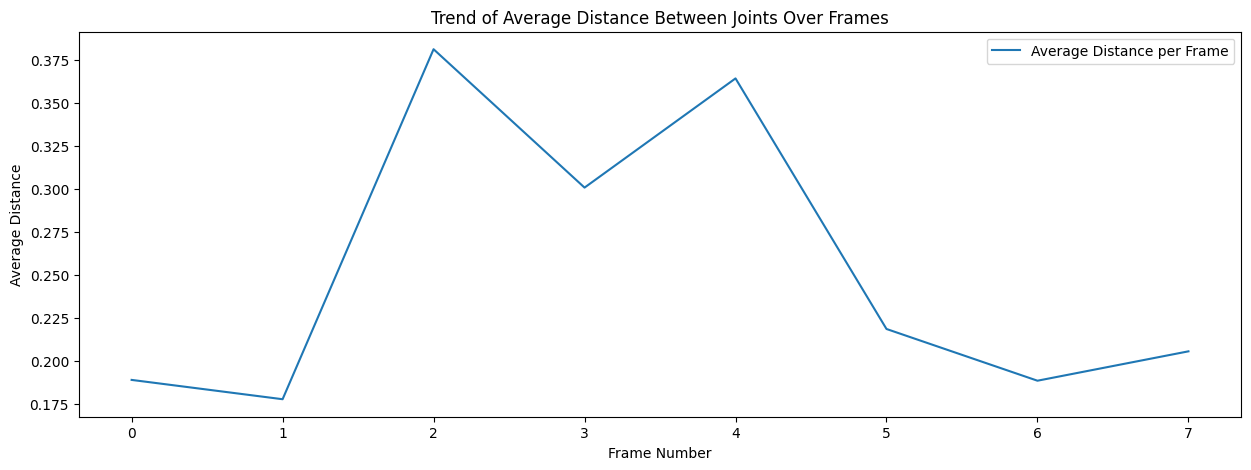

In [ ]:
# @title `Pose Estimation Accuracy - Results Visualisation 1: Average distance between joints over frames`

# Assuming `pose_distances` is a list of average distances for each frame
plt.figure(figsize=(15, 5))
plt.plot(pose_distances, label='Average Distance per Frame')
plt.xlabel('Frame Number')
plt.ylabel('Average Distance')
plt.title('Trend of Average Distance Between Joints Over Frames')
plt.legend()
plt.show()

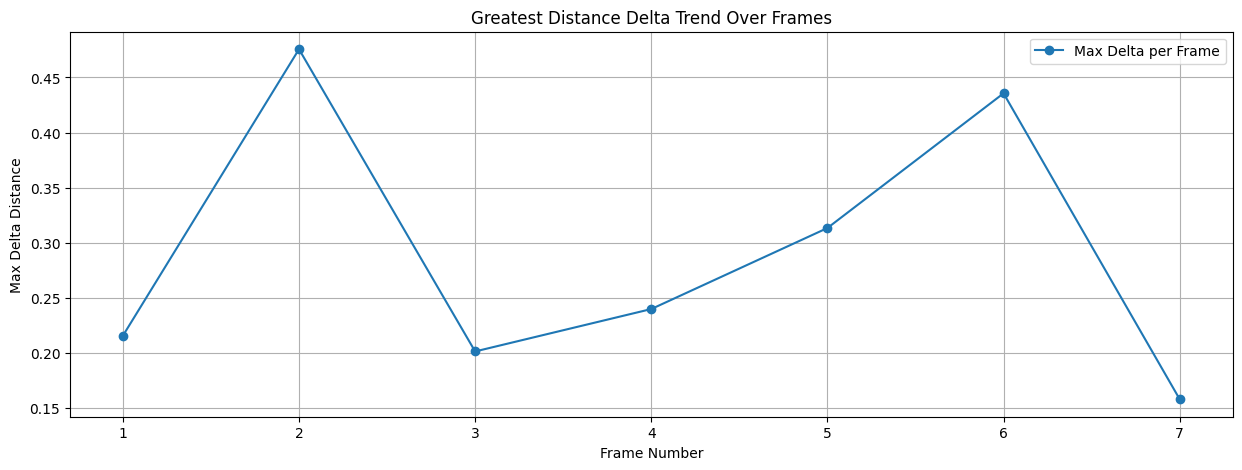

In [ ]:
# @title `Pose Estimation Accuracy - Results Visualisation 2: Trend of the greatest distance change (delta) between consecutive frames for each joint.`
import pandas as pd

# Load the CSV file
df = pd.read_csv(csv_output_path)

# Calculate the deltas for each joint by subtracting the previous frame's distance
# We use `.diff()` and then `.abs()` to get the absolute change
deltas = df.iloc[:, 2:].diff().abs()

# Identify the joint with the greatest change for each frame
# We use `.idxmax()` to get the column name (joint name) of the max value for each row
max_delta_joints = deltas.idxmax(axis=1)

# Get the maximum delta values for each frame
max_deltas = deltas.max(axis=1)

# Create a new DataFrame to plot
plot_df = pd.DataFrame({
    'frame': df['frame'],
    'max_delta': max_deltas,
    'joint': max_delta_joints
})

# Plotting the trend of the greatest delta
plt.figure(figsize=(15, 5))
plt.plot(plot_df['frame'], plot_df['max_delta'], label='Max Delta per Frame', marker='o')

# Optionally, annotate the joints that have the maximum delta
# for i, row in plot_df.iterrows():
    # plt.annotate(row['joint'], (row['frame'], row['max_delta']), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Greatest Distance Delta Trend Over Frames')
plt.xlabel('Frame Number')
plt.ylabel('Max Delta Distance')
plt.legend()
plt.grid(True)
plt.show()


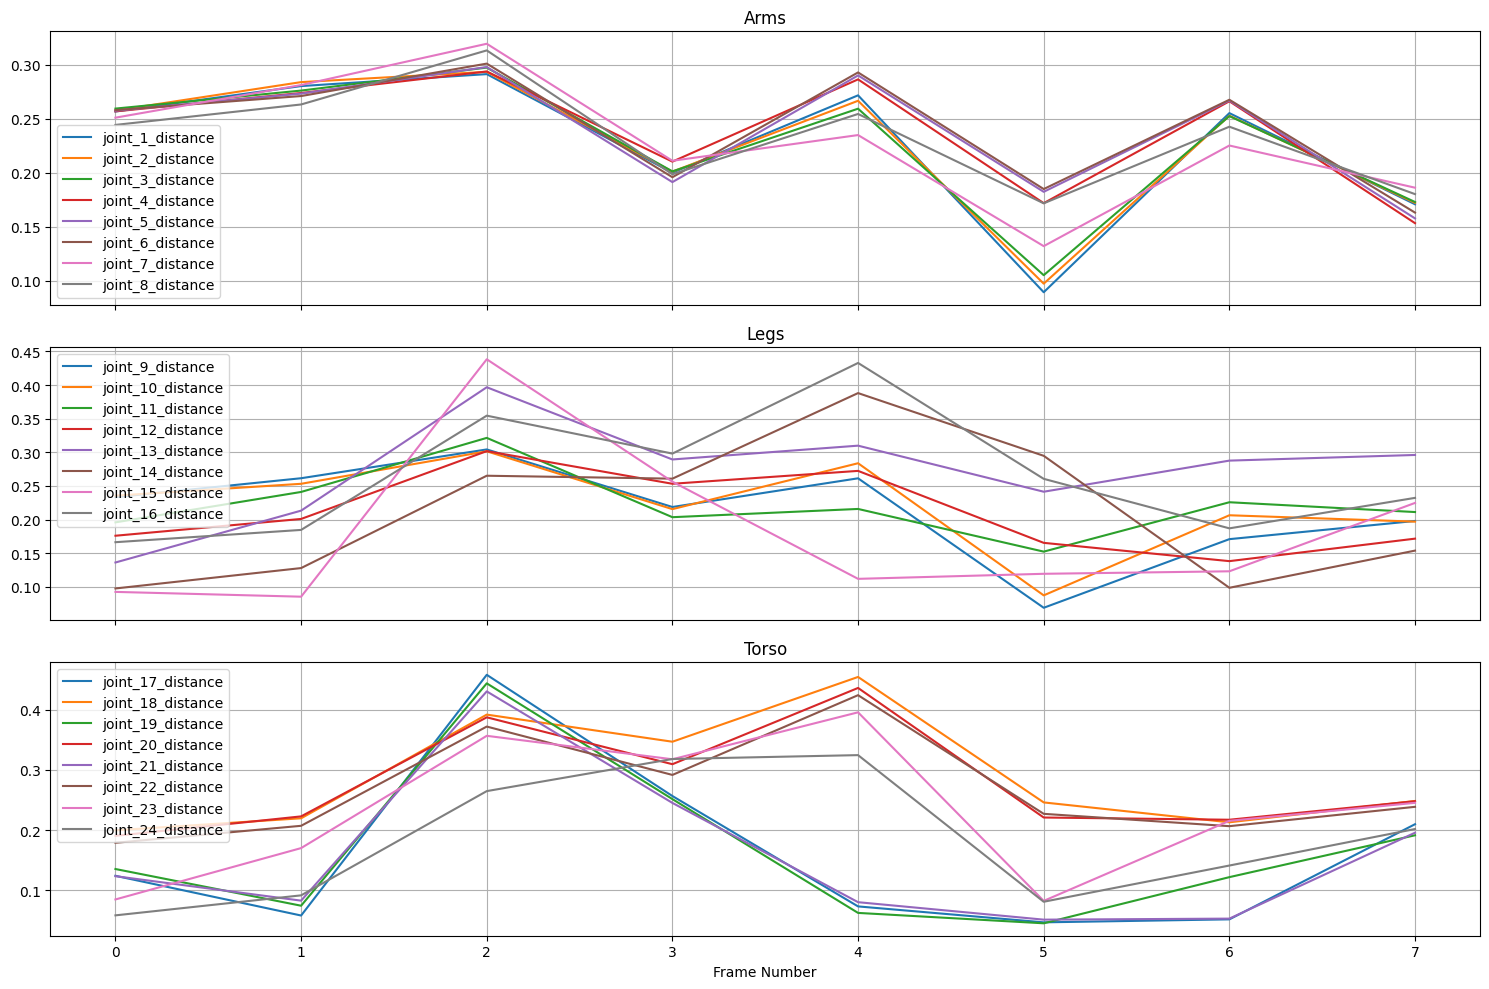

In [ ]:
# @title `Pose Estimation Accuracy - Results Visualisation 3:  Joint groups distance trends over frames`

import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv(csv_output_path)

# Define joint groups
joint_groups = {
    'Arms': [f'joint_{i}_distance' for i in range(1, 9)],
    'Legs': [f'joint_{i}_distance' for i in range(9, 17)],
    'Torso': [f'joint_{i}_distance' for i in range(17, 25)],
    # Add more groups as needed
}

fig, axes = plt.subplots(len(joint_groups), 1, figsize=(15, 10), sharex=True)

for ax, (group_name, joints) in zip(axes, joint_groups.items()):
    for joint in joints:
        ax.plot(df['frame'], df[joint], label=joint)
    ax.set_title(group_name)
    ax.legend()
    ax.grid(True)

plt.xlabel('Frame Number')
fig.tight_layout()  # Adjust subplots to fit in to the figure area.
plt.show()

